# YAAD

In [1]:
from yaad import Node
from yaad import ops
from yaad import dot

In [5]:
a = Node(2, requires_grad=True, name='a')
b = Node(3, requires_grad=True, name='b')
c = Node(5, requires_grad=True)
d = a * b
d.retain_grad()
e = d + c

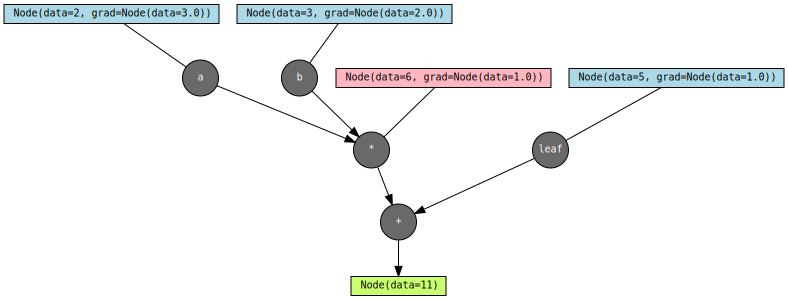

In [8]:
dot.make_dot(e)

In [4]:
# de/dd = 1
# de/dc = 1
# de/da = de/dd * dd/da = 1 * 3 = 3
# de/db = de/dd * dd/db = 1 * 2 = 2

In [7]:
e.backward()

In [6]:
a.grad.is_leaf()

False

In [11]:
b.grad.requires_grad

True

In [12]:
c.grad.requires_grad

False

In [9]:
print(a.grad, b.grad, c.grad)

Node(data=2.0, grad=None) Node(data=3.0, grad=None) Node(data=1.0)


In [5]:
d.op

In [6]:
d.backward()

In [7]:
d.grad

/workspace/personal/yaad/yaad/node.py:44: UserWarning: gradient attribute of non-leaf nodes are not stored unless `retain_grad` has been explicitly set.
  warnings.warn(


True

In [5]:
d.op.next_ops

(<yaad.ops.LeafOp at 0x7f9ff4643190>, <yaad.ops.MulOp at 0x7f9ff46430a0>)

In [5]:
d.op.grad_store

Node(data=1.0)

In [6]:
e = b+c

In [7]:
e.op.grad_store

GradStore(value=0.0)

# Pytorch

In [7]:
import torch

In [8]:
a = torch.randn(2,requires_grad = False)

In [10]:
a.is_leaf

True

In [12]:
b = a + 2

In [13]:
c = 2*b

In [14]:
# c = 2*a + 4

In [17]:
d = c.mean()

In [18]:
d.backward()